# Introduction
This notebook mainly computes the ideal values for semantic scales and multi dimensional scaling given the data from MarkStrat. 

The difference between the metrics is explained in the guide:

----
## Semantic Scales vs. Multidimensional Scaling vs. Conjoint Analysis

The three studies—**Semantic Scales**, **Multidimensional Scaling** (MDS), and **Conjoint Analysis**—provide valuable insights into how to reposition a brand to better meet consumer needs. Here’s a guide on when to use each study and its primary objective:

- **Semantic Scales** and **Multidimensional Scaling (MDS)**: Aim to bring your brand closer to the ideal point of the targeted consumer segment.
- **Conjoint Analysis**: Aim to maximize the overall utility of your brand.

In most cases, the results from these three studies will align. However, if you’re wondering, “Which study should I use?” here are some recommendations:

### When to Use Each Study

- **Use Semantic Scales to design R&D projects**: 
  - This study is ideal for determining the optimal level of each physical characteristic, as it provides a direct one-to-one relationship between the study's dimensions and product physical characteristics.

- **Use the MDS study to decide on your strategy**:
  - MDS is excellent for strategy development because it provides a comprehensive overview of the competitive landscape. Comparing perceptual maps side by side can help you:
    - Identify potential repositioning for existing brands.
    - Find opportunities to launch new brands.
    - Anticipate competitor moves.

- **Use the MDS study for communication**:
  - This study is beneficial for communication because:
    1. It focuses on the dimensions that matter most to customers (e.g., Economy, Performance, Convenience).
    2. It allows for repositioning along more physical characteristics than Semantic Scales.

- **Use Conjoint Analysis to validate findings**:
  - Conjoint Analysis can confirm or challenge the insights from the other studies. For example, will the new features or price maximize the total utility of your product?
  - **Be cautious**: Conjoint Analysis may have limitations since it tests only four levels across four dimensions. The optimal level for a given feature often lies between the tested values, but pinpointing the exact optimal level may not be possible.

----


# Analysis

**Initializing**

In [89]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

from Brands import Sonites
from Analyzer import Analyzer
from Solver import Solver


#move_mkt_weights = {
#    "Explorers": 0,
#    "Shoppers": 0.35,
#    "Professionals": 0,
#    "High Earners": 0,
#    "Savers": 0.65
#}


#an = Analyzer(marketing_mix_segment_weights=move_mkt_weights, last_period=2)
an = Analyzer(last_period=2)

son = Sonites()

solver = Solver()


No weights provided
before
./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
after
./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
./Exports/TeamExport_A46051_Alpha_M_Period 3.xlsx loaded
Attributes file:./Attributes/attributes_3.json


**Percentage expenditure by segment for each product**

In [90]:
df_marketing_mixes = son.get_marketing_mixes(capped=False)
df_marketing_mixes


,Explorers,Shoppers,Professionals,High Earners,Savers
MARKET : Sonites,,,,,
MOST,0.086735,0.086735,0.086735,0.086735,0.653061
MOVE,0.619048,0.095238,0.095238,0.095238,0.095238
ROBUDO,0.08631,0.53869,0.08631,0.08631,0.202381
ROCK,0.145907,0.085409,0.455516,0.227758,0.085409
ROLLED,0.175853,0.089239,0.089239,0.55643,0.089239
SOFT,0.149758,0.251208,0.149758,0.149758,0.299517
SOLO,0.202899,0.275362,0.173913,0.173913,0.173913
TONE,0.239044,0.12749,0.131474,0.306773,0.195219
TONYO,0.106667,0.173333,0.54,0.09,0.09


## Semantic scales

In [91]:
son.df_segments_semantic

,Segment,Period,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Index,,,,,,,,
Explorers_3,Explorers,3,4.47,2.07,5.63,5.82,6.02,3.89
High Earners_3,High Earners,3,3.28,6.36,3.53,4.29,4.7,5.54
Professionals_3,Professionals,3,5.07,5.84,5.01,5.62,5.59,5.43
Savers_3,Savers,3,2.62,3.91,1.82,2.88,2.27,2.11
Shoppers_3,Shoppers,3,1.93,4.86,2.88,4.41,4.25,2.93
Explorers_2,Explorers,2,4.55,1.91,5.82,5.91,6.13,3.7
High Earners_2,High Earners,2,3.27,6.37,3.55,4.47,4.78,5.57
Professionals_2,Professionals,2,5.32,5.85,5.03,5.54,5.43,5.23
Savers_2,Savers,2,2.58,3.9,1.78,2.73,2.25,2.13


In [92]:
son.df_sonites_semantic

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
MARKET : Sonites,,,,,,
MOST,2.11,2.34,3.31,1.71,1.5,2.27
MOVE,4.26,2.58,5.93,4.56,4.58,4.71
ROBUDO,2.11,4.77,2.39,4.22,3.32,2.92
ROCK,4.97,6.37,5.57,5.93,5.54,5.59
ROLLED,3.3,6.37,3.4,4.22,4.74,5.63
SOFT,1.73,1.63,3.31,1.61,1.53,2.28
SOLO,1.73,3.23,4,2.07,2.82,4.34
TONE,5.32,6.5,5.12,4.52,5.51,5.78
TONYO,3.74,2.34,2.88,3.59,6.5,5.82


### Compute Distances between Segments and Products 

----
#### Note on "Relevance Score"

The **relevance score** quantifies the alignment between an observation and a benchmark (ideal target), with values ranging from 0 to 1:

- A score of **1** indicates that the observation perfectly matches the benchmark.
- A score of **0** indicates the maximum possible distance between the observation and benchmark, within the given feature space.

##### Formal Calculation

Given:
- An **observation vector** $ \mathbf{x} = (x_1, x_2, \dots, x_n) $
- A **benchmark vector** $ \mathbf{y} = (y_1, y_2, \dots, y_n) $
- A **weight vector** $ \mathbf{w} = (w_1, w_2, \dots, w_n) $, where each $ w_i $ represents the relative importance of feature $ i $ and $ \sum_{i=1}^n w_i = 1 $

The relevance score $ R $ is computed as follows:

\begin{equation*}
R = 1 - \frac{D(\mathbf{x}, \mathbf{y})}{D_{\text{max}}}
\end{equation*}

where:
- $ D(\mathbf{x}, \mathbf{y}) $ is the **weighted Euclidean distance** between the observation and the benchmark:

  \begin{equation*}
  D(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^n w_i \cdot (x_i - y_i)^2}
  \end{equation*}

- $ D_{\text{max}} $ is the **maximum possible weighted Euclidean distance** for the feature space, assuming each feature spans the full range from minimum to maximum possible values. For example, if features range from 1 to 7, the maximum distance for each feature $ i $ would be $ x_i - y_i = 6 $:

  \begin{equation*}
  D_{\text{max}} = \sqrt{\sum_{i=1}^n w_i \cdot (\Delta_i)^2}
  \end{equation*}

  where $ \Delta_i $ is the maximum possible range for feature $ i $.

##### Interpretation

- **High Relevance Score (close to 1)**: The observation is highly similar to the benchmark.
- **Low Relevance Score (closer to 0)**: The observation is farther from the benchmark.
----


#### Compute closest brands for each segment

In [93]:
df_seg_sem = son.df_segments_semantic[:5][['# Features', 'Design Index', 'Battery Life','Display Size', 'Proc. Power', 'Price']]
df_seg_sem


_ = an.get_n_closest(df_base=df_seg_sem, df_performers=son.df_sonites_semantic, num_top=3, max_distance_1D=6)

---------- Explorers_3 ----------
Segment:	 MOVE
Distance:	 0.8338244129938279
Segment:	 TOPS
Distance:	 0.7863853029417611
Segment:	 TONYO
Distance:	 0.7260308094264748

---------- High Earners_3 ----------
Segment:	 ROLLED
Distance:	 0.9877795598399202
Segment:	 TONE
Distance:	 0.8745116617821647
Segment:	 ROCK
Distance:	 0.8401003128638566

---------- Professionals_3 ----------
Segment:	 ROCK
Distance:	 0.9535552752705204
Segment:	 TONE
Distance:	 0.9151975598638423
Segment:	 ROLLED
Distance:	 0.8513451518150555

---------- Savers_3 ----------
Segment:	 MOST
Distance:	 0.8532635491041665
Segment:	 ROBUDO
Distance:	 0.8444621785902577
Segment:	 SOFT
Distance:	 0.8208875425844598

---------- Shoppers_3 ----------
Segment:	 ROBUDO
Distance:	 0.9209436960543412
Segment:	 SOLO
Distance:	 0.7434864651750572
Segment:	 MOVE
Distance:	 0.720146807879944



#### Compute closest Segments for each Brand

In [94]:
_ = an.get_n_closest(df_base=son.df_sonites_semantic, df_performers=df_seg_sem, max_distance_1D=6)

---------- MOST ----------
Segment:	 Savers_3
Distance:	 0.8532635491041665
Segment:	 Shoppers_3
Distance:	 0.6821353658752831
Segment:	 Explorers_3
Distance:	 0.5113555960674228

---------- MOVE ----------
Segment:	 Explorers_3
Distance:	 0.8338244129938279
Segment:	 Professionals_3
Distance:	 0.7665090058378295
Segment:	 High Earners_3
Distance:	 0.7396234331948848

---------- ROBUDO ----------
Segment:	 Shoppers_3
Distance:	 0.9209436960543412
Segment:	 Savers_3
Distance:	 0.8444621785902577
Segment:	 High Earners_3
Distance:	 0.6804812576663006

---------- ROCK ----------
Segment:	 Professionals_3
Distance:	 0.9535552752705204
Segment:	 High Earners_3
Distance:	 0.8401003128638566
Segment:	 Explorers_3
Distance:	 0.6895008679214942

---------- ROLLED ----------
Segment:	 High Earners_3
Distance:	 0.9877795598399202
Segment:	 Professionals_3
Distance:	 0.8513451518150555
Segment:	 Shoppers_3
Distance:	 0.6930512780265294

---------- SOFT ----------
Segment:	 Savers_3
Distance:	 0.82

#### Distances between all points

In [95]:
df_all_sem = son.get_comprehensive_df_semantic()
index = df_all_sem.index 

distances = an.compute_distance_centroids(df_all_sem, df_all_sem, max_distance_1D=6)[3]


df_out_sem = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out_sem.loc[start, stop] = distances[start][stop]
        df_out_sem.loc[stop, start] = distances[start][stop]

df_out_sem

,MOST,MOVE,ROBUDO,ROCK,ROLLED,SOFT,SOLO,TONE,TONYO,TOPS,Explorers_3,High Earners_3,Professionals_3,Savers_3,Shoppers_3
MOST,1.0,0.580785,0.7364,0.394226,0.47734,0.955888,0.748031,0.409323,0.434279,0.452468,0.511356,0.484455,0.423197,0.853264,0.682135
MOVE,0.580785,1.0,0.696837,0.73465,0.733303,0.574038,0.753829,0.730011,0.758599,0.75547,0.833824,0.739623,0.766509,0.599606,0.720147
ROBUDO,0.7364,0.696837,1.0,0.599184,0.671594,0.710322,0.7696,0.598124,0.569406,0.614235,0.65619,0.680481,0.626164,0.844462,0.920944
ROCK,0.394226,0.73465,0.599184,1.0,0.836206,0.37397,0.587529,0.911054,0.691235,0.66849,0.689501,0.8401,0.953555,0.460566,0.636447
ROLLED,0.47734,0.733303,0.671594,0.836206,1.0,0.4565,0.690157,0.874635,0.72207,0.670492,0.64436,0.98778,0.851345,0.541599,0.693051
SOFT,0.955888,0.574038,0.710322,0.37397,0.4565,1.0,0.738214,0.388568,0.432241,0.45197,0.507281,0.463325,0.40415,0.820888,0.6602
SOLO,0.748031,0.753829,0.7696,0.587529,0.690157,0.738214,1.0,0.615265,0.637611,0.608002,0.62874,0.695014,0.615456,0.733228,0.743486
TONE,0.409323,0.730011,0.598124,0.911054,0.874635,0.388568,0.615265,1.0,0.716864,0.647947,0.660839,0.874512,0.915198,0.469841,0.631087
TONYO,0.434279,0.758599,0.569406,0.691235,0.72207,0.432241,0.637611,0.716864,1.0,0.805346,0.726031,0.718938,0.729332,0.46682,0.60645
TOPS,0.452468,0.75547,0.614235,0.66849,0.670492,0.45197,0.608002,0.647947,0.805346,1.0,0.786385,0.671915,0.705146,0.502808,0.649167


## Multi Dimensional Scaling

In [96]:
son.df_segments_mds

,Segment,Period,Economy,Performance,Convenience
Index,,,,,
Explorers_3,Explorers,3,0.76,13.06,-6.52
High Earners_3,High Earners,3,-10.26,3.88,9.92
Professionals_3,Professionals,3,-9.56,10.68,10.66
Savers_3,Savers,3,12.62,-10.32,-4.24
Shoppers_3,Shoppers,3,7.1,2,1.12
Explorers_2,Explorers,2,2.02,13.74,-6.96
High Earners_2,High Earners,2,-10.44,4.56,9.98
Professionals_2,Professionals,2,-8.22,9.74,10.88
Savers_2,Savers,2,12.5,-10.72,-4.36


In [97]:
son.df_sonites_mds

,Economy,Performance,Convenience
MARKET : Sonites,,,
MOST,11.52,-16.48,-9.92
MOVE,-4.72,3.84,-3.9
ROBUDO,7.18,-2.72,0.18
ROCK,-10.6,11.06,13.8
ROLLED,-10.88,3.86,9.8
SOFT,11.48,-16.32,-13.48
SOLO,-2.28,-9.38,-5.1
TONE,-11.9,8.08,16.36
TONYO,-12.14,12.26,-9.4


### Compute Distances between Segments and Products 

#### Compute closest brands for each segment

In [98]:
df_seg_mds = son.df_segments_mds[:5][['Economy', 'Performance', 'Convenience']]

_ = an.get_n_closest(df_base=df_seg_mds, df_performers=son.df_sonites_mds, num_top=3, max_distance_1D=40, weighted="eq")

---------- Explorers_3 ----------
Segment:	 MOVE
Distance:	 0.8406372063497882
Segment:	 TOPS
Distance:	 0.8371068857604267
Segment:	 TONYO
Distance:	 0.8088715527888815

---------- High Earners_3 ----------
Segment:	 ROLLED
Distance:	 0.9908804239864637
Segment:	 TONE
Distance:	 0.8865290051745969
Segment:	 ROCK
Distance:	 0.8820996183212285

---------- Professionals_3 ----------
Segment:	 ROCK
Distance:	 0.9519427424835749
Segment:	 TONE
Distance:	 0.9034710751467037
Segment:	 ROLLED
Distance:	 0.898969476559474

---------- Savers_3 ----------
Segment:	 MOST
Distance:	 0.8780215182911346
Segment:	 ROBUDO
Distance:	 0.8507728241907662
Segment:	 SOFT
Distance:	 0.8401320857707839

---------- Shoppers_3 ----------
Segment:	 ROBUDO
Distance:	 0.9305251844191005
Segment:	 MOVE
Distance:	 0.8127510569678251
Segment:	 SOLO
Distance:	 0.7689799792225791



#### Compute closest Segments for each Brand

In [99]:
_ = an.get_n_closest(df_base=son.df_sonites_mds, df_performers=df_seg_mds, num_top=3, max_distance_1D=40, weighted="eq")

---------- MOST ----------
Segment:	 Savers_3
Distance:	 0.8780215182911346
Segment:	 Shoppers_3
Distance:	 0.6828090743206336
Segment:	 Explorers_3
Distance:	 0.5435761290204029

---------- MOVE ----------
Segment:	 Explorers_3
Distance:	 0.8406372063497882
Segment:	 Shoppers_3
Distance:	 0.8127510569678251
Segment:	 High Earners_3
Distance:	 0.7850942066858131

---------- ROBUDO ----------
Segment:	 Shoppers_3
Distance:	 0.9305251844191005
Segment:	 Savers_3
Distance:	 0.8507728241907662
Segment:	 Explorers_3
Distance:	 0.7357736134801572

---------- ROCK ----------
Segment:	 Professionals_3
Distance:	 0.9519427424835749
Segment:	 High Earners_3
Distance:	 0.8820996183212285
Segment:	 Explorers_3
Distance:	 0.6627463862313704

---------- ROLLED ----------
Segment:	 High Earners_3
Distance:	 0.9908804239864637
Segment:	 Professionals_3
Distance:	 0.898969476559474
Segment:	 Shoppers_3
Distance:	 0.710574419467341

---------- SOFT ----------
Segment:	 Savers_3
Distance:	 0.840132085770

#### Distances between all points

In [100]:
df_all_mds = son.get_comprehensive_df_mds()
index = df_all_mds.index 

distances = an.compute_distance_centroids(df_all_mds, df_all_mds, weighted="eq", max_distance_1D=40)[3]


df_out_mds = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out_mds.loc[start, stop] = distances[start][stop]
        df_out_mds.loc[stop, start] = distances[start][stop]

df_out_mds

,MOST,MOVE,ROBUDO,ROCK,ROLLED,SOFT,SOLO,TONE,TONYO,TOPS,Explorers_3,High Earners_3,Professionals_3,Savers_3,Shoppers_3
MOST,1.0,0.614621,0.745792,0.385864,0.478713,0.948561,0.765443,0.380469,0.462635,0.481352,0.543576,0.483093,0.421646,0.878022,0.682809
MOVE,0.614621,1.0,0.795219,0.711327,0.783188,0.601921,0.805191,0.683773,0.819605,0.786492,0.840637,0.785094,0.757528,0.676833,0.812751
ROBUDO,0.745792,0.795219,1.0,0.620439,0.689757,0.714939,0.816444,0.606702,0.62101,0.619045,0.735774,0.696348,0.655514,0.850773,0.930525
ROCK,0.385864,0.711327,0.620439,1.0,0.881048,0.357513,0.580619,0.940271,0.663953,0.586573,0.662746,0.8821,0.951943,0.475255,0.659609
ROLLED,0.478713,0.783188,0.689757,0.881048,1.0,0.450538,0.686662,0.886456,0.696964,0.61698,0.681647,0.99088,0.898969,0.555018,0.710574
SOFT,0.948561,0.601921,0.714939,0.357513,0.450538,1.0,0.746801,0.349294,0.461606,0.487639,0.537546,0.454521,0.39543,0.840132,0.656014
SOLO,0.765443,0.805191,0.816444,0.580619,0.686662,0.746801,1.0,0.577229,0.651193,0.631312,0.672506,0.688716,0.617089,0.784152,0.76898
TONE,0.380469,0.683773,0.606702,0.940271,0.886456,0.349294,0.577229,1.0,0.623307,0.541736,0.615788,0.886529,0.903471,0.466898,0.637651
TONYO,0.462635,0.819605,0.62101,0.663953,0.696964,0.461606,0.651193,0.623307,1.0,0.894751,0.808872,0.694829,0.707185,0.510625,0.650561
TOPS,0.481352,0.786492,0.619045,0.586573,0.61698,0.487639,0.631312,0.541736,0.894751,1.0,0.837107,0.616642,0.632349,0.525224,0.649833


# Forecast analysis

In [101]:
df_seg_sem_fc = an.forecast_df(son.df_segments_semantic, steps=2)

df_seg_sem_fc = df_seg_sem_fc[(df_seg_sem_fc["Period"]>=4)][["# Features",	"Design Index",	"Battery Life",	"Display Size",	"Proc. Power",	"Price"]]
df_seg_sem_fc

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Shoppers_5,2.09,4.8,2.99,4.77,4.88,3.08
Professionals_5,4.46,5.71,4.97,5.86,6.14,5.62
Explorers_5,4.49,2.74,5.43,5.49,5.91,4.4
Savers_5,2.63,3.93,1.97,3.14,2.2,1.96
High Earners_5,3.37,6.34,3.49,3.86,4.29,5.37
Shoppers_4,2.0,4.79,2.9,4.57,4.51,2.93
Explorers_4,4.44,2.33,5.49,5.69,5.94,4.12
Savers_4,2.64,3.92,1.88,3.02,2.26,2.06
High Earners_4,3.31,6.35,3.51,4.09,4.55,5.48
Professionals_4,4.79,5.8,4.99,5.72,5.81,5.57


In [102]:
df_all_sem = pd.concat([df_seg_sem_fc, son.df_sonites_semantic], join="inner")
index = df_all_sem.index

distances = an.compute_distance_centroids(df_all_sem, df_all_sem, weighted="default", max_distance_1D=6)[3]


df_out_sem_fc = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out_sem_fc.loc[start, stop] = distances[start][stop]
        df_out_sem_fc.loc[stop, start] = distances[start][stop]

df_out_sem_fc

,Shoppers_5,Professionals_5,Explorers_5,Savers_5,High Earners_5,Shoppers_4,Explorers_4,Savers_4,High Earners_4,Professionals_4,MOST,MOVE,ROBUDO,ROCK,ROLLED,SOFT,SOLO,TONE,TONYO,TOPS
Shoppers_5,1.0,0.676444,0.751959,0.726563,0.726729,0.963849,0.750811,0.731427,0.721515,0.684815,0.633124,0.736553,0.8666,0.6678,0.708923,0.614143,0.715461,0.657244,0.639036,0.685661
Professionals_5,0.676444,1.0,0.78203,0.444816,0.790687,0.648684,0.746159,0.451858,0.813873,0.968535,0.386398,0.743909,0.593068,0.930334,0.827045,0.369559,0.584022,0.88903,0.743238,0.716944
Explorers_5,0.751959,0.78203,1.0,0.545547,0.701784,0.727061,0.960027,0.551324,0.709637,0.782002,0.506429,0.872791,0.664784,0.75086,0.708173,0.499471,0.656133,0.727387,0.77552,0.806568
Savers_5,0.726563,0.444816,0.545547,1.0,0.57003,0.761426,0.551354,0.985844,0.550118,0.462755,0.846812,0.591832,0.839992,0.453837,0.529737,0.814624,0.716929,0.459865,0.452751,0.494844
High Earners_5,0.726729,0.790687,0.701784,0.57003,1.0,0.716841,0.668814,0.579242,0.972347,0.811803,0.520009,0.742211,0.705793,0.807503,0.949529,0.497478,0.728101,0.84687,0.701872,0.653596
Shoppers_4,0.963849,0.648684,0.727061,0.761426,0.716841,1.0,0.727004,0.766094,0.708476,0.659081,0.6644,0.724641,0.899446,0.644227,0.693864,0.643901,0.729859,0.63642,0.616347,0.6624
Explorers_4,0.750811,0.746159,0.960027,0.551354,0.668814,0.727004,1.0,0.556346,0.675431,0.745542,0.512326,0.85525,0.663312,0.715909,0.672951,0.50713,0.644084,0.689159,0.749717,0.800955
Savers_4,0.731427,0.451858,0.551324,0.985844,0.579242,0.766094,0.556346,1.0,0.559196,0.469794,0.849444,0.598617,0.845448,0.460239,0.538858,0.817246,0.727499,0.467958,0.463146,0.502119
High Earners_4,0.721515,0.813873,0.709637,0.550118,0.972347,0.708476,0.675431,0.559196,1.0,0.833383,0.498288,0.741192,0.69012,0.82715,0.976159,0.476676,0.708551,0.864941,0.713856,0.664986
Professionals_4,0.684815,0.968535,0.782002,0.462755,0.811803,0.659081,0.745542,0.469794,0.833383,1.0,0.404827,0.755833,0.608994,0.951287,0.844611,0.386797,0.601418,0.909643,0.736642,0.709813


In [103]:
df_seg_mds_fc = an.forecast_df(son.df_segments_mds, steps=2)

df_seg_mds_fc = df_seg_mds_fc[(df_seg_mds_fc["Period"]==4)][["Economy",	"Performance", "Convenience"]]
df_seg_mds_fc

,Economy,Performance,Convenience
Shoppers_4,7.0,3.6,0.58
Explorers_4,-0.84,12.52,-5.56
Savers_4,12.74,-9.92,-4.12
High Earners_4,-10.08,3.04,9.86
Professionals_4,-10.32,12.08,10.44


In [104]:
df_all_mds = pd.concat([df_seg_mds_fc, son.df_sonites_mds], join="inner")
index = df_all_mds.index

distances = an.compute_distance_centroids(df_all_mds, df_all_mds, weighted="eq", max_distance_1D=40)[3]


df_out_mds_fc = pd.DataFrame(columns=index, index=index)

for i, start in enumerate(index):
    index_to_search = index[i:]
    for stop in index_to_search:
        df_out_mds_fc.loc[start, stop] = distances[start][stop]
        df_out_mds_fc.loc[stop, start] = distances[start][stop]

df_out_mds_fc

,Shoppers_4,Explorers_4,Savers_4,High Earners_4,Professionals_4,MOST,MOVE,ROBUDO,ROCK,ROLLED,SOFT,SOLO,TONE,TONYO,TOPS
Shoppers_4,1.0,0.807034,0.777407,0.719317,0.687379,0.666494,0.818866,0.908559,0.664534,0.709609,0.642182,0.755536,0.638784,0.664299,0.666538
Explorers_4,0.807034,1.0,0.620844,0.706663,0.731492,0.540657,0.860692,0.737986,0.686353,0.707124,0.533128,0.683149,0.639872,0.827697,0.84063
Savers_4,0.777407,0.620844,1.0,0.570816,0.49425,0.872392,0.679117,0.854768,0.478375,0.557103,0.83533,0.782604,0.46956,0.512907,0.527851
High Earners_4,0.719317,0.706663,0.570816,1.0,0.869205,0.491973,0.786543,0.702515,0.870808,0.983442,0.462956,0.697614,0.87841,0.690363,0.613
Professionals_4,0.687379,0.731492,0.49425,0.869205,1.0,0.403624,0.747969,0.637555,0.949156,0.880721,0.378515,0.600348,0.894384,0.71242,0.636272
MOST,0.666494,0.540657,0.872392,0.491973,0.403624,1.0,0.614621,0.745792,0.385864,0.478713,0.948561,0.765443,0.380469,0.462635,0.481352
MOVE,0.818866,0.860692,0.679117,0.786543,0.747969,0.614621,1.0,0.795219,0.711327,0.783188,0.601921,0.805191,0.683773,0.819605,0.786492
ROBUDO,0.908559,0.737986,0.854768,0.702515,0.637555,0.745792,0.795219,1.0,0.620439,0.689757,0.714939,0.816444,0.606702,0.62101,0.619045
ROCK,0.664534,0.686353,0.478375,0.870808,0.949156,0.385864,0.711327,0.620439,1.0,0.881048,0.357513,0.580619,0.940271,0.663953,0.586573
ROLLED,0.709609,0.707124,0.557103,0.983442,0.880721,0.478713,0.783188,0.689757,0.881048,1.0,0.450538,0.686662,0.886456,0.696964,0.61698



## Move - R&D


**Current Features**

In [105]:
move_feat = son.move_features
move_feat

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Rec. retail price,Base Cost
MARKET : Sonites,,,,,,,
MOVE,13,6,82,31,83,350,158


### Computing Estimates

In [106]:
df_seg_sem_fc = an.forecast_df(son.df_segments_semantic, steps=2)

df_seg_sem_fc_0 = df_seg_sem_fc[df_seg_sem_fc["Period"]==5]

df_seg_sem_fc_0 = df_seg_sem_fc_0[df_seg_sem_fc_0["Segment"]=="Explorers"]

target_sem = df_seg_sem_fc_0.drop(labels=["Segment", "Period"], axis=1)

target_sem = target_sem.values
#target_sem = np.array([4.3, 2.3, 5.2, 5.6, 5.8, 4.2]) #mean with markstrat values

target_sem



array([[4.489999999999991, 2.7399999999999896, 5.42999999999998,
        5.489999999999952, 5.909999999999947, 4.39999999999999]],
      dtype=object)

In [107]:
df_seg_mds_fc = an.forecast_df(son.df_segments_mds, steps=2)
df_seg_mds_fc_0 = df_seg_mds_fc[df_seg_mds_fc["Period"]==5]

df_seg_mds_fc_0 = df_seg_mds_fc_0[df_seg_mds_fc_0["Segment"]=="Explorers"]

target_mds = df_seg_mds_fc_0.drop(labels=["Segment", "Period"], axis=1)

target_mds = target_mds.values
#target_mds = np.array([-1.5, 11.6, -5.9])
target_mds

array([[-2.9, 12.199999999999974, -3.8200000000000056]], dtype=object)

In [108]:
optimum = solver.find_optimum(ideal_semantic=target_sem, ideal_mds=target_mds, semantic_weights=son.rel_importance_features)
optimum[0]

Optimal Features: [ 15.21881737   5.75970507  67.31022355  32.47393891  96.51555597
 361.66304349]
Minimum Combined Error: 0.05237559647022638


array([ 15.21881737,   5.75970507,  67.31022355,  32.47393891,
        96.51555597, 361.66304349])

**Results**

In [109]:
markstrat_estimated_best_features = np.array([14.96818945, 5.32805963, 65.38163001, 33.06392089, 93.89043895, 347.15026871])
my_estimated_best_features = np.array([15.36473309, 5.74220196, 68.17267308, 32.85945771, 96.60463274, 360.99314539])

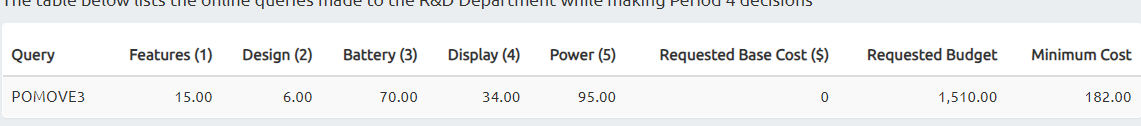



## MOVE - Next Period

In [110]:
son.move_semantic

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
MARKET : Sonites,,,,,,
MOVE,4.26,2.58,5.93,4.56,4.58,4.71


In [111]:
move_features = son.move_features.drop(labels=["Base Cost"], axis=1).values.flatten()
move_features

array([ 13,   6,  82,  31,  83, 350], dtype=int64)

In [112]:
df_seg_sem_fc = an.forecast_df(son.df_segments_semantic, steps=2)

df_seg_sem_fc_0 = df_seg_sem_fc[df_seg_sem_fc["Period"]==4]

df_seg_sem_fc_0 = df_seg_sem_fc_0[df_seg_sem_fc_0["Segment"]=="Explorers"]

target_sem = df_seg_sem_fc_0.drop(labels=["Segment", "Period"], axis=1)

target_sem = target_sem.values

target_sem = target_sem.flatten()
target_sem

array([4.439999999999998, 2.3299999999999974, 5.489999999999995,
       5.689999999999989, 5.939999999999985, 4.119999999999997],
      dtype=object)

In [113]:
res = an.compute_distance_centroids(son.move_semantic, target_sem)
res[4]

{'MOVE': {'centroid': array([0.17999999999999794, 0.25000000000000266, 0.44000000000000483,
         1.1299999999999892, 1.3599999999999852, 0.5900000000000025],
        dtype=object)}}

**Fixing Targets for Display and Processing Power**

In [114]:

res = an.compute_distance_centroids(np.array([4.26, 2.58, 5.93, 5.689999999999989, 5.939999999999985, 4.71]), target_sem)
res[3]

{'observation': {'centroid': 0.9328947557989452}}

In [115]:
df_seg_mds_fc = an.forecast_df(son.df_segments_mds, steps=2)
df_seg_mds_fc_0 = df_seg_mds_fc[df_seg_mds_fc["Period"]==4]

df_seg_mds_fc_0 = df_seg_mds_fc_0[df_seg_mds_fc_0["Segment"]=="Explorers"]

target_mds = df_seg_mds_fc_0.drop(labels=["Segment", "Period"], axis=1)

target_mds = target_mds.values
target_mds = target_mds.flatten()
target_mds

array([-0.8400000000000001, 12.519999999999992, -5.5600000000000005],
      dtype=object)

In [116]:
res = an.compute_distance_centroids(son.move_mds, target_mds, weighted="eq", max_distance_1D=40)
res[3]

{'MOVE': {'centroid': 0.8606918882476688}}

In [ ]:
solver.regress_mds([ 13, 6, 82, 31, 83, 310])

array([-0.32681818,  4.1451179 , -3.07444552])

In [118]:
res = an.compute_distance_centroids(son.move_mds, target_mds, weighted="eq", max_distance_1D=40)
res[3]

{'MOVE': {'centroid': 0.8606918882476688}}

## MOST - Next Period

**Important Caveat**
- Our production price will go from 47 to 76, hence to maintain the current margin (103$) we should increase the price.

In [119]:
an.compute_contribution(265, 65, [11/42, 26/42, 5/42])

101

### Semantic Scales

In [120]:
target_sem = df_seg_sem_fc[(df_seg_sem_fc["Segment"]=="Savers")*(df_seg_sem_fc["Period"]==4)][["# Features", "Design Index", "Battery Life", "Display Size", "Proc. Power", "Price"]]
target_sem 

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Savers_4,2.64,3.92,1.88,3.02,2.26,2.06


In [127]:
new_features = np.array([9, 7, 36, 16, 27, 270])

semantic_regressed = np.array(solver.regress_semantic(new_features))

semantic_regressed

array([2.5528312 , 4.25027871, 1.80054909, 2.92825451, 2.32386554,
       3.04346943])

**Fixing Price and Design**
- [2.5528312, 3.9, 1.80054909, 2.92825451, 2.32386554, 2]

In [132]:
res = an.compute_distance_centroids(np.array([2.5528312, 3.9, 1.80054909, 2.92825451, 2.32386554, 2]), target_sem)
res[3]

{'observation': {'Savers_4': 0.9890561701614895}}

### Multi Dimensional Scaling

In [123]:
df_seg_mds_fc = an.forecast_df(son.df_segments_mds, steps=2)

target_mds = df_seg_mds_fc[(df_seg_mds_fc["Segment"]=="Savers")*(df_seg_mds_fc["Period"]==4)][["Economy", "Performance", "Convenience"]]
target_mds 

,Economy,Performance,Convenience
Savers_4,12.74,-9.92,-4.12


In [124]:
mds_regressed = np.array(solver.regress_mds(new_features))
mds_regressed 

array([ 9.89439968, -4.94874332,  0.47334818])

In [125]:
res = an.compute_distance_centroids(mds_regressed, target_mds, max_distance_1D=40, weighted="eq")
res[3]

{'observation': {'Savers_4': 0.8940227208827074}}

### Sensitivity Analysis

In [126]:
from Utils import combined_error

for price in np.linspace(262, 300, num=10):
    print(f"Price {price}")
    new_features = np.array([9, 7, 36, 16, 27, price])
    res = combined_error(features=new_features, ideal_semantic=target_sem.values, ideal_mds=target_mds.values, semantic_weights=son.rel_importance_features, mds_weights=[1/3, 1/3,1/3], error_weights=[1,1], model=solver)
    print(f"Combined_error: {res}")


Price 262.0
Combined_error: 0.19538432559205332
Price 266.22222222222223
Combined_error: 0.20407474590040175
Price 270.44444444444446
Combined_error: 0.21314801099766412
Price 274.6666666666667
Combined_error: 0.22257549038187385
Price 278.8888888888889
Combined_error: 0.23232865872821773
Price 283.1111111111111
Combined_error: 0.24237971047869422
Price 287.3333333333333
Combined_error: 0.25270204642974914
Price 291.55555555555554
Combined_error: 0.26327061905654014
Price 295.77777777777777
Combined_error: 0.2740621454373394
Price 300.0
Combined_error: 0.2850552082681146
